In [14]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
torch.cuda.is_available()

True

In [16]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [17]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [18]:
complete_data

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
0,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,1,1.000000,1.000000,5000.0,2.277446,0.000455
1,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,2,1.000000,0.991304,5000.0,220.451716,0.044090
2,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,3,0.997826,1.000000,5000.0,0.389587,0.000078
3,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,4,0.991304,1.000000,5000.0,0.261074,0.000052
4,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,5,0.991304,1.000000,5000.0,0.261064,0.000052
...,...,...,...,...,...,...,...,...,...
553,MultiLayerPerceptron_standwalkjump_6,MultiLayerPerceptron,standwalkjump,6,1.000000,0.500000,5000.0,8.519672,0.001704
554,MultiLayerPerceptron_standwalkjump_7,MultiLayerPerceptron,standwalkjump,7,1.000000,0.333333,5000.0,8.507372,0.001701
555,MultiLayerPerceptron_standwalkjump_8,MultiLayerPerceptron,standwalkjump,8,1.000000,0.500000,5000.0,8.522695,0.001705
556,MultiLayerPerceptron_standwalkjump_9,MultiLayerPerceptron,standwalkjump,9,1.000000,0.500000,5000.0,8.554916,0.001711


In [19]:
complete_data.query("model_name == 'FullyConvolutionalNetwork1DLate'").query("dataset == 'eigenworms'")

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
318,FullyConvolutionalNetwork1DLate_eigenworms_1,FullyConvolutionalNetwork1DLate,eigenworms,1,1.0,0.826923,2988.0,9223.304334,3.086782
319,FullyConvolutionalNetwork1DLate_eigenworms_2,FullyConvolutionalNetwork1DLate,eigenworms,2,1.0,0.846154,2524.0,6388.041970,2.530920
320,FullyConvolutionalNetwork1DLate_eigenworms_3,FullyConvolutionalNetwork1DLate,eigenworms,3,1.0,0.903846,2787.0,7240.867151,2.598087
321,FullyConvolutionalNetwork1DLate_eigenworms_4,FullyConvolutionalNetwork1DLate,eigenworms,4,1.0,0.923077,2621.0,4115.663702,1.570265
322,FullyConvolutionalNetwork1DLate_eigenworms_5,FullyConvolutionalNetwork1DLate,eigenworms,5,1.0,0.923077,2565.0,4027.761118,1.570277
323,FullyConvolutionalNetwork1DLate_eigenworms_6,FullyConvolutionalNetwork1DLate,eigenworms,6,1.0,0.807692,3532.0,7769.648662,2.199787
324,FullyConvolutionalNetwork1DLate_eigenworms_7,FullyConvolutionalNetwork1DLate,eigenworms,7,1.0,0.846154,2589.0,5234.824862,2.021949
325,FullyConvolutionalNetwork1DLate_eigenworms_8,FullyConvolutionalNetwork1DLate,eigenworms,8,1.0,0.903846,3733.0,5859.964262,1.569773
326,FullyConvolutionalNetwork1DLate_eigenworms_9,FullyConvolutionalNetwork1DLate,eigenworms,9,1.0,0.942308,4906.0,7709.971071,1.571539
327,FullyConvolutionalNetwork1DLate_eigenworms_10,FullyConvolutionalNetwork1DLate,eigenworms,10,1.0,0.884615,2644.0,5499.709627,2.080072


In [20]:
agg_results_data = get_all_results(True)

In [21]:
agg_results_data.query("model_name == 'FullyConvolutionalNetwork1DGAP'")

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
1,articularywordrecognition,FullyConvolutionalNetwork1DGAP,0.998043,0.995652,1223.600000,64.587083,0.055665
10,atrialfibrillation,FullyConvolutionalNetwork1DGAP,1.000000,0.433333,2520.500000,37.317006,0.014806
17,basicmotions,FullyConvolutionalNetwork1DGAP,1.000000,1.000000,4.600000,0.049344,0.010593
24,cricket,FullyConvolutionalNetwork1DGAP,0.981944,1.000000,12.400000,0.417166,0.034725
31,eigenworms,FullyConvolutionalNetwork1DGAP,1.000000,0.927350,3213.333333,3051.144425,0.958434
38,natops,FullyConvolutionalNetwork1DGAP,0.993403,0.995833,876.300000,28.284067,0.033378
45,racketsports,FullyConvolutionalNetwork1DGAP,1.000000,0.936066,2632.200000,135.415578,0.051074
52,standwalkjump,FullyConvolutionalNetwork1DGAP,1.000000,0.500000,2527.000000,66.115840,0.026158


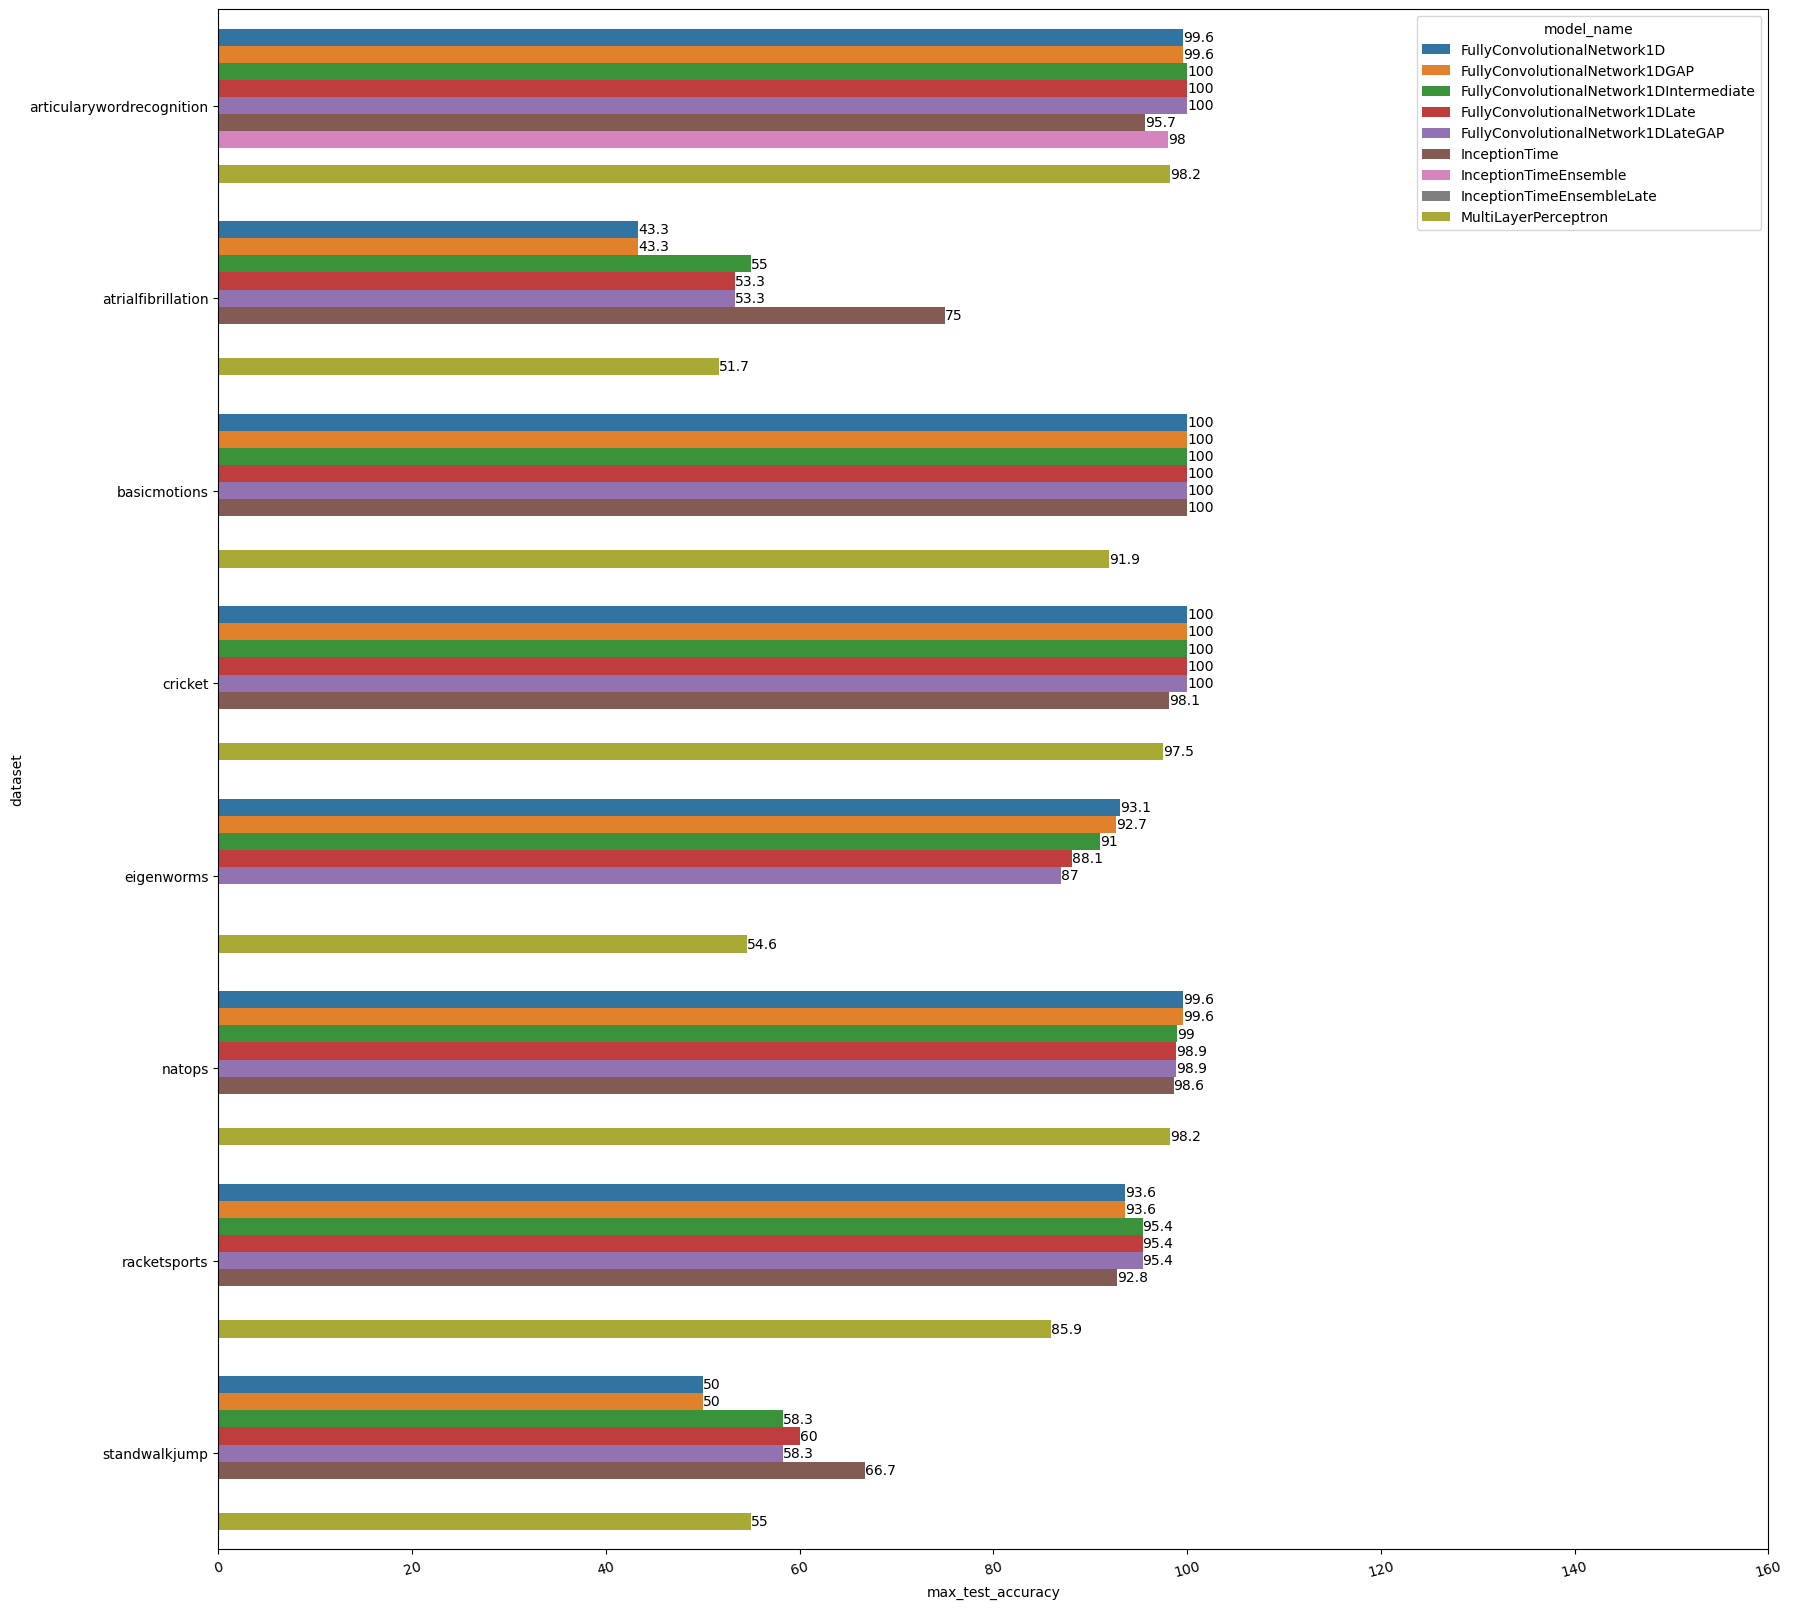

In [22]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = agg_results_data, 
    y = 'dataset', 
    x = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

In [23]:
test_tensor = torch.ones(1, 10,4)
conv_test = nn.Conv1d(in_channels= 10, out_channels=10, kernel_size = 1)
result = conv_test(test_tensor)

In [24]:
next(conv_test.parameters()).shape

torch.Size([10, 10, 1])

In [25]:
test_tensor.shape

torch.Size([1, 10, 4])

In [26]:
result.shape

torch.Size([1, 10, 4])